# Notebook to generate hierarchical block model circle-network plot

In [6]:
import pandas as pd
import numpy as np
import graph_tool.all as gt

### Data

In [4]:
top30_lst =  pd.read_pickle("../../results/top30_mean_all.pkl")

In [10]:
graph_kt = ['stereotype', 'exclusion', 'prejudice', 'superiority', 'experience', 
            'overt', 'homophobia', 'bias', 'racial_discrimination', 'religion', 
            'oppression', 'implicit', 'racism', 'discrimination', 'segregation', 
            'perceived', 'sexism', 'stereotyping', 'belief', 
            'race', 'racial', 'sexual_orientation',
            'systemic', 'gender', 'interpersonal', 'injustice', 'historical', 
            'culture', 'cultural', 'construct', 'identity',
            'stress', 'stigma', 'deprivation', 'negative', 'disadvantage', 'biological',
            'driver', 'psychosocial', 'wealth', 'consequence', 
            'affecting', 'environmental', 'economic', 'vulnerability', 
            'food_security', 'distribution', 'underlying', 'poverty',
            'societal', 'norm', 'power', 'sociopolitical', 'fundamental', 
            'structural', 'influence',
            'difference', 'sex', 'class', 'ethnicity', 'disparity']

node_labels = {word:i for i, word in enumerate(set(graph_kt))}
sub_30lst = [(x, y) for x,y in top30_lst if x in set(node_labels)]

### Block model plot

In [11]:
np.random.seed(1234567891)

num_vertices = len(graph_kt)

g = gt.Graph(directed=False)
vertices = [g.add_vertex() for _ in set(graph_kt)]

# adding edges
for word_lst in sub_30lst:
    word, word_related_dict = word_lst
    for related_word, weight in word_related_dict.items():
        if related_word in node_labels:
            g.add_edge(vertices[node_labels[word]], vertices[node_labels[related_word]])

In [13]:
state = gt.minimize_nested_blockmodel_dl(g)

In [14]:
v_text = g.new_vertex_property("string")
for i, vert in enumerate(vertices):
    v_text[vert] = graph_kt[i]

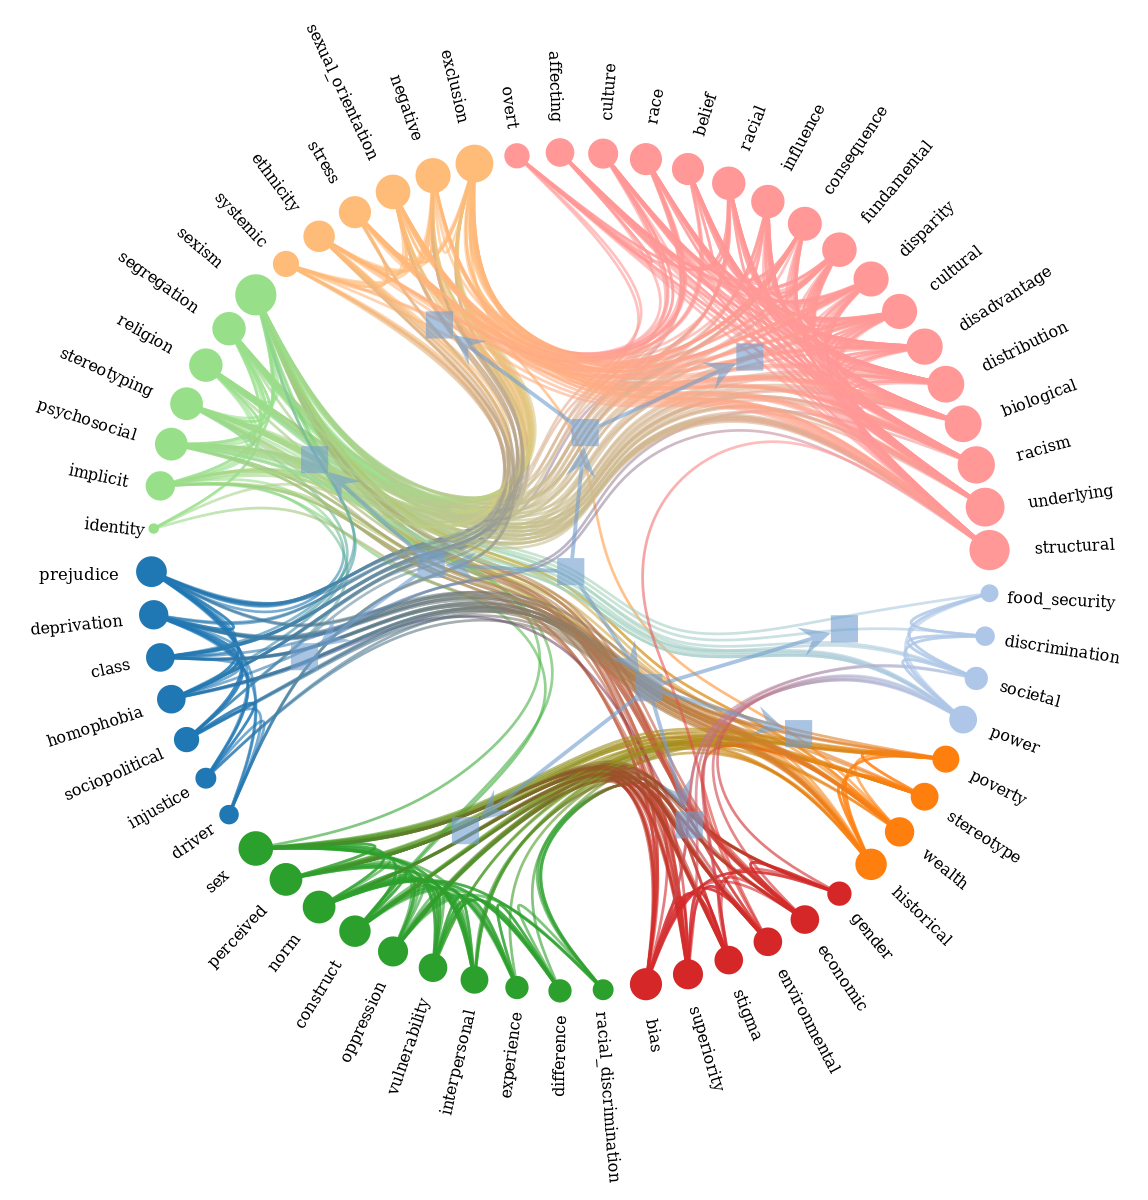

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffb0f9d7950, at 0x7ffb0f9ec850>,
 <GraphView object, directed, with 73 vertices and 72 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7ffb0db423d0, at 0x7ffb0f9e9a90>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7ffb0db423d0, at 0x7ffb0f9ea290>, False), at 0x7ffb0db423d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffb0db423d0, at 0x7ffb0f9ecd10>)

In [17]:
state.draw(vertex_text = v_text, vertex_text_position='centered')#, output="../../results/figures/example_network_graph.pdf")